In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
df = pd.DataFrame(pd.read_excel("data.xlsx"))

l = list(df.columns[52:])
df = df.drop(l, axis = 1)

#clean data
df.iloc[:, 41:] = df.iloc[:, 41:].replace(r'^\s*$', np.nan, regex=True)

#try different strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df.iloc[:, 41:])
df.iloc[:, 41:] = imputer.fit_transform(df.iloc[:, 41:])

In [7]:
l = list(df.columns[15:])
df_clinic_data = df.drop(l, axis = 1)
a = list(df.columns[:41])
df_CT = df.drop(a, axis = 1)
b = list(df.columns[:15]) + list(df.columns[41:])
df_outcome = df.drop(b, axis = 1)

In [13]:
df["Age at CT"]

0       73
1       55
2       52
3       60
4       88
        ..
9218    52
9219    51
9220    63
9221    55
9222    61
Name: Age at CT, Length: 9223, dtype: int64

In [37]:
df_CT["Age at CT"] = df["Age at CT"]
df_CT = df_CT.drop(["VAT/SAT     Ratio"], axis = 1)
df_CT.corr()

,L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median),Age at CT
L1_HU_BMD,1.000000,-0.075332,-0.073395,-0.095125,-0.025382,0.244075,0.006155,0.052523,-0.212457,0.036257,-0.397985
TAT Area (cm2),-0.075332,1.000000,0.949176,0.845128,0.834816,-0.417971,0.427059,0.477673,0.131477,-0.422036,0.086886
Total Body Area EA (cm2),-0.073395,0.949176,1.000000,0.880545,0.703768,-0.333819,0.528747,0.532179,0.140411,-0.444809,0.076375
VAT Area (cm2),-0.095125,0.845128,0.880545,1.000000,0.443213,-0.279281,0.505935,0.492622,0.188364,-0.420875,0.149465
SAT Area (cm2),-0.025382,0.834816,0.703768,0.443213,1.000000,-0.435580,0.191327,0.297404,0.021785,-0.279889,-0.012554
Muscle HU,0.244075,-0.417971,-0.333819,-0.279281,-0.435580,1.000000,0.148845,0.076768,-0.244978,0.201574,-0.394988
Muscle Area (cm2),0.006155,0.427059,0.528747,0.505935,0.191327,0.148845,1.000000,0.834095,0.054738,-0.249976,-0.087537
L3 SMI (cm2/m2),0.052523,0.477673,0.532179,0.492622,0.297404,0.076768,0.834095,1.000000,0.063533,-0.266040,-0.077203
AoCa Agatston,-0.212457,0.131477,0.140411,0.188364,0.021785,-0.244978,0.054738,0.063533,1.000000,-0.079259,0.463679
Liver HU (Median),0.036257,-0.422036,-0.444809,-0.420875,-0.279889,0.201574,-0.249976,-0.266040,-0.079259,1.000000,-0.053401


In [34]:
df_CT.columns

Index(['L1_HU_BMD', 'TAT Area (cm2)',
       'Total Body                Area EA (cm2)', 'VAT Area (cm2)',
       'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)', 'Age at CT'],
      dtype='object')

In [42]:
import scipy
from scipy import stats

l_slope = []
l_intercept = []
l_rvalue = []
l_pvalue = []
l_std = []
for i in range(0, 10):
    slope, intercept, rvalue, pvalue, std = scipy.stats.linregress(df_CT.iloc[:, i], df_CT.iloc[:, -1])
    l_slope.append(slope)
    l_intercept.append(intercept)
    l_rvalue.append(rvalue)
    l_pvalue.append(pvalue)
    l_std.append(std)

In [49]:
from sklearn.metrics import mean_squared_error
l_mse = []
for i in range(0, 10):
    y_pred = df_CT.iloc[:, i]*l_slope[i]+l_intercept[i]
    y_true = df_CT.iloc[:, -1]
    l_mse.append(mean_squared_error(y_true, y_pred))

In [65]:
BA_E = []
key = list(df_CT.columns)
for i in df_CT.to_dict('records'):
    denomi = 0
    numerator = 0
    for j in range(0, 10):
        denomi += (l_slope[j]/l_mse[j])**2
        numerator += (l_slope[j]/(l_mse[j])**2)*(i[key[j]] - l_intercept[j])
    BA_E.append(numerator/denomi)

In [70]:
df_CT["BA_E"] = BA_E
df_CT

,L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median),Age at CT,BA_E
0,135.0,377.708045,672.207190,172.991393,208.044914,18.242557,170.053192,58.717526,5473.561,35.0,73,301.781580
1,192.0,485.502857,694.314286,183.497143,302.008571,16.150123,123.968745,48.413187,2709.064,52.0,55,171.684594
2,256.0,490.054545,706.051515,159.706061,330.348485,23.337964,136.566261,50.101332,0.000,54.0,52,-10.794188
3,149.0,289.108108,584.489189,144.002703,145.102703,30.804567,212.296726,69.115854,2586.575,57.0,60,123.247021
4,106.0,315.530769,588.892308,202.317949,113.212821,-3.181874,168.923950,47.814581,431.519,53.0,88,239.014388
...,...,...,...,...,...,...,...,...,...,...,...,...
9218,148.0,420.046763,642.357864,157.105587,262.941176,31.595440,165.413121,55.447848,0.000,38.0,52,64.834404
9219,167.0,185.183362,500.051686,92.813192,92.370170,41.896333,188.676052,59.683360,139.967,54.0,51,-13.880901
9220,135.0,822.287179,1154.605128,247.784615,574.502564,17.102222,143.309862,57.786350,1115.997,45.0,63,197.542534
9221,219.0,418.200000,660.346154,213.748718,204.448718,29.610469,138.824463,50.929786,3515.371,44.0,55,124.557215


In [77]:
import math
n = 0
d = 0
for i in range(0, 10):
    n += (l_rvalue[i]**2)/math.sqrt(1 - l_rvalue[i]**2)
    d += (l_rvalue[i])/math.sqrt(1 - l_rvalue[i]**2)
    
r_char = n/d
r_char

-2.483853828190777

In [83]:
CA_min = min(df_CT.loc[:, "Age at CT"])
CA_max = max(df_CT.loc[:, "Age at CT"])

In [84]:
tmp = 0
for i in df_CT.to_dict('records'):
    print(i["Age at CT"])
    print(i["BA_E"])
    break

73
301.7815803909706


In [93]:
diff = df_CT.loc[:, "Age at CT"] - df_CT.loc[:, "BA_E"]
diff -= sum(diff)/len(diff)
temp = sum(diff**2)/len(diff)
s2_BA = temp - ((1-r_char**2)/(r_char**2))*((CA_max - CA_min)**2/120) #120 - 12* 10
s2_BA

10755.4942606187

In [95]:
BA_EC = []
key = list(df_CT.columns)
for i in df_CT.to_dict('records'):
    denomi = 0
    numerator = 0
    for j in range(0, 10):
        denomi += (l_slope[j]/l_mse[j])**2
        numerator += (l_slope[j]/(l_mse[j])**2)*(i[key[j]] - l_intercept[j])
    BA_EC.append((numerator + i["Age at CT"]/s2_BA)/(denomi + 1/s2_BA))

In [96]:
df_CT["BA_EC"] = BA_EC
df_CT

,L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median),Age at CT,BA_E,BA_EC
0,135.0,377.708045,672.207190,172.991393,208.044914,18.242557,170.053192,58.717526,5473.561,35.0,73,301.781580,125.477058
1,192.0,485.502857,694.314286,183.497143,302.008571,16.150123,123.968745,48.413187,2709.064,52.0,55,171.684594,81.764673
2,256.0,490.054545,706.051515,159.706061,330.348485,23.337964,136.566261,50.101332,0.000,54.0,52,-10.794188,37.596505
3,149.0,289.108108,584.489189,144.002703,145.102703,30.804567,212.296726,69.115854,2586.575,57.0,60,123.247021,74.507364
4,106.0,315.530769,588.892308,202.317949,113.212821,-3.181874,168.923950,47.814581,431.519,53.0,88,239.014388,122.639112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9218,148.0,420.046763,642.357864,157.105587,262.941176,31.595440,165.413121,55.447848,0.000,38.0,52,64.834404,54.943907
9219,167.0,185.183362,500.051686,92.813192,92.370170,41.896333,188.676052,59.683360,139.967,54.0,51,-13.880901,36.117863
9220,135.0,822.287179,1154.605128,247.784615,574.502564,17.102222,143.309862,57.786350,1115.997,45.0,63,197.542534,93.860860
9221,219.0,418.200000,660.346154,213.748718,204.448718,29.610469,138.824463,50.929786,3515.371,44.0,55,124.557215,70.954772


In [101]:
df_CT.describe()

,L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median),Age at CT,BA_E,BA_EC
count,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000
mean,171.167720,377.708045,672.207190,172.991393,208.044914,28.913116,154.362254,52.845874,698.799375,55.354028,57.093679,70.882694,60.256551
std,42.142652,186.700674,218.928186,119.720468,104.456803,12.091008,45.869030,12.429037,1747.858987,10.321099,7.829047,107.963258,28.738143
min,-20.000000,0.000000,253.376871,0.000000,0.000000,-118.307532,9.376304,0.562102,0.000000,-21.000000,23.000000,-196.020478,-19.091715
25%,142.000000,244.458301,516.051366,85.140000,132.291858,22.286171,122.057556,44.651435,0.000000,52.000000,51.000000,2.010515,41.721325
50%,169.000000,359.125581,644.854286,150.686486,191.925747,30.627068,147.574841,52.146334,58.502000,58.000000,56.000000,54.062355,55.243949
75%,197.000000,481.984093,784.779730,228.658857,266.906718,37.504251,185.637206,60.567021,492.984000,62.000000,61.000000,117.642195,72.754892
max,378.000000,1206.222222,1859.699346,1054.685714,763.112121,99.484949,1605.744327,187.713528,36942.923000,105.000000,95.000000,1355.230439,378.672552


In [102]:
df_log = df_CT
temp = df.iloc[:,15]       
df_log["DEATH [d from CT]"] = temp
df_log

,L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median),Age at CT,BA_E,BA_EC,DEATH [d from CT]
0,135.0,377.708045,672.207190,172.991393,208.044914,18.242557,170.053192,58.717526,5473.561,35.0,73,301.781580,125.477058,967.0
1,192.0,485.502857,694.314286,183.497143,302.008571,16.150123,123.968745,48.413187,2709.064,52.0,55,171.684594,81.764673,359.0
2,256.0,490.054545,706.051515,159.706061,330.348485,23.337964,136.566261,50.101332,0.000,54.0,52,-10.794188,37.596505,NaN
3,149.0,289.108108,584.489189,144.002703,145.102703,30.804567,212.296726,69.115854,2586.575,57.0,60,123.247021,74.507364,2351.0
4,106.0,315.530769,588.892308,202.317949,113.212821,-3.181874,168.923950,47.814581,431.519,53.0,88,239.014388,122.639112,658.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9218,148.0,420.046763,642.357864,157.105587,262.941176,31.595440,165.413121,55.447848,0.000,38.0,52,64.834404,54.943907,NaN
9219,167.0,185.183362,500.051686,92.813192,92.370170,41.896333,188.676052,59.683360,139.967,54.0,51,-13.880901,36.117863,NaN
9220,135.0,822.287179,1154.605128,247.784615,574.502564,17.102222,143.309862,57.786350,1115.997,45.0,63,197.542534,93.860860,NaN
9221,219.0,418.200000,660.346154,213.748718,204.448718,29.610469,138.824463,50.929786,3515.371,44.0,55,124.557215,70.954772,NaN


In [109]:
log_1 = df_log[df_log["DEATH [d from CT]"] > 0]
log_2 = df_log[df_log["DEATH [d from CT]"].isna()]
#print(log_1.describe())
log_1.describe()

,L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median),Age at CT,BA_E,BA_EC,DEATH [d from CT]
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,151.081368,406.596384,719.850456,211.171067,199.269486,20.868108,150.884472,52.257723,2470.798517,53.596726,65.151184,183.901429,92.389669,2268.253188
std,47.377489,199.443985,240.633435,133.068453,104.445068,15.264407,46.353384,14.135803,3572.541978,10.650173,11.186740,166.319641,43.552475,1314.409179
min,55.000000,20.072442,321.824242,9.363115,9.453488,-118.307532,27.922454,10.904482,0.000000,-21.000000,23.000000,-137.359757,-9.824377,9.000000
25%,113.000000,264.861538,550.591892,117.212903,119.979070,11.928312,117.705947,43.483222,131.342000,50.000000,56.000000,70.225722,61.446196,1154.000000
50%,146.000000,385.951282,675.677419,184.227273,188.390323,22.156334,149.371294,52.845874,872.589000,55.354028,64.000000,155.019980,86.774437,2225.000000
75%,180.000000,521.162162,843.805405,271.833333,257.969231,30.804567,185.506198,61.010517,3541.443000,60.000000,73.000000,271.404878,116.289856,3347.000000
max,359.000000,1046.928378,1641.385621,837.921569,603.846911,73.980641,280.415981,117.735193,31723.945000,105.000000,95.000000,1355.230439,378.672552,5070.000000


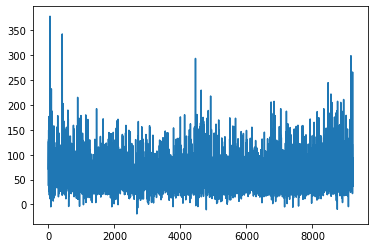

In [107]:
import matplotlib.pyplot as plt
plt.plot(list(df_CT.iloc[:, -2]))

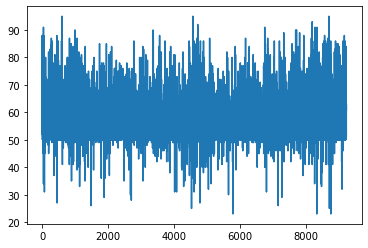

In [108]:
plt.plot(list(df_CT.iloc[:, -4]))